### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib

matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['savefig.dpi'] = 300

### Read in CSV files

Create dataframe "timedf" and then mask out wavelengths over atmospheric absorption bands.<BR>
Final result is "time_masked" dataframe.

In [2]:

def ReadInCSVs(full_csvs):
    
    all_dfs=[]
    
    for i in range(len(full_csvs)):
        if i==0:
            lstemp = pd.read_csv('../../CSV/FULL_SPEC_AVG/'+full_csvs[i])
            all_dfs.append(lstemp)
        else:
            lstemp = pd.read_csv('../../CSV/FULL_SPEC_AVG/'+full_csvs[i], usecols=[1])
            all_dfs.append(lstemp)
        
    return pd.concat(all_dfs, axis=1)

full_csvs = ['WIN08MAY18.csv', 'WIN27MAY18.csv', 'WIN21JUN18.csv', 'WIN20OCT18.csv']

timedf = ReadInCSVs(full_csvs)
timedf.set_index('Wavelength', inplace=True)

maska = timedf['08MAY18'].where(np.logical_or(timedf.index < 1340, timedf.index > 1450))
maskb = maska.where(np.logical_or(maska.index < 1790, maska.index > 1950))
masked = maskb.where(np.logical_or(maskb.index<2350, maskb.index>2500))

mask = masked.div(masked)
time_masked = timedf.div(mask, axis=0)


### FIGURE: plot averaged spectra for each field campaign

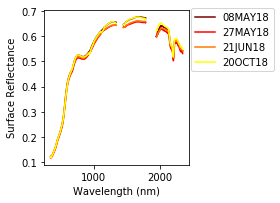

In [15]:
colpac=['#770000', '#FF0000', '#FF7700', '#FFFF00', '#77FF00', '#00FF00', 
        '#00FF77', '#00FFFF', '#0077FF', '#0000FF', '#000077', '#FF00FF', '#777777', '#770077', '#777700']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 5.5))
plt.tight_layout(pad=11, w_pad=1.0, h_pad=1.0)

for i in range(len(time_masked.columns)):
    axes.plot(time_masked[time_masked.columns[i]], color=colpac[i])

axes.legend(time_masked.columns, loc=(1.01,0.605))
axes.set_xlabel('Wavelength (nm)')
axes.set_ylabel('Surface Reflectance')

plt.savefig('WINplot1.png')

### FIGURE: Time Plot
Plot daily rainfall numbers, as well as markers for the date of field campaigns,<BR>
using the same colours as the above figure.

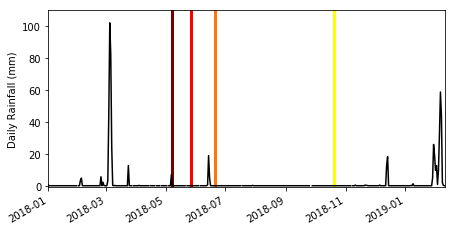

In [4]:
rain_dat = '../../Weather/IDCJAC0009_037039_1800_Data.csv'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 3.5))
plt.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)

krain = pd.read_csv(rain_dat, parse_dates=[[2,3,4]])
krain.rename({'Rainfall amount (millimetres)': 'rain'}, axis=1, inplace=True)
krain.rename(columns={'Year_Month_Day': 'Date'}, inplace=True)
krain.set_index('Date', inplace=True)


axes.plot(krain.rain, color='k')
axes.set_xlim(pd.datetime(2018,1,1), pd.datetime(2019,2,11))
axes.set_ylim(-1, 110)
axes.set_ylabel('Daily Rainfall (mm)')
fig.autofmt_xdate()
for i in range(len(time_masked.columns)):
    axes.scatter(time_masked.columns[i][:7], 0, marker='|', s=1000000, linewidth=3, color=colpac[i])

               
plt.savefig('WINplot2.png')

### Older version - Read in CSVs

In [5]:
def ReadInCSVs(ls8_csvs, sent_csvs):

    ls8_ftimes = ls8_csvs.copy()
    sent_ftimes = sent_csvs.copy()

    ls8_fdata = pd.DataFrame()
    sent_fdata = pd.DataFrame()

    for i in range(len(ls8_csvs)):
        ls8_ftimes[i] = pd.Timestamp(ls8_csvs[i][4:11]).dayofyear
        sent_ftimes[i] = pd.Timestamp(sent_csvs[i][4:11]).dayofyear
        lstemp = pd.read_csv('../../CSV/'+ls8_csvs[i])
        senttemp = pd.read_csv('../../CSV/'+sent_csvs[i])
        lstemp.set_index('Unnamed: 0', inplace=True)
        senttemp.set_index('Unnamed: 0', inplace=True)
        ls8_fdata[str(ls8_csvs[i][4:11])] = lstemp['Field_mean']
        sent_fdata[str(sent_csvs[i][4:11])] = senttemp['Field_mean']

    return ls8_ftimes, sent_ftimes, ls8_fdata, sent_fdata

ls8_csvs = ['WIN_08MAY18__Landsat8.csv', 'WIN_27MAY18__Landsat8.csv', 'WIN_21JUN18__Landsat8.csv',
            'WIN_19OCT18__Landsat8.csv', 'WIN_20OCT18__Landsat8.csv']

sent_csvs = ['WIN_08MAY18__Sentinel2b.csv', 'WIN_27MAY18__Sentinel2b.csv', 'WIN_21JUN18__Sentinel2a.csv',
            'WIN_19OCT18__Sentinel2b.csv', 'WIN_20OCT18__Sentinel2b.csv']

ls8_ftimes, sent_ftimes, ls8_fdata, sent_fdata = ReadInCSVs(ls8_csvs, sent_csvs)

### FIGURE: Plot band-averaged field spectra

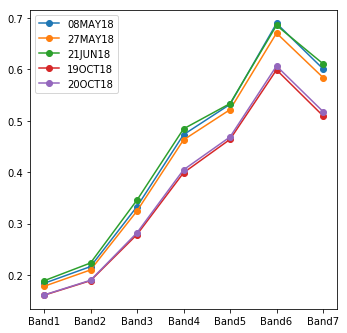

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 5.5))

axes.plot(ls8_fdata, '-o')
axes.legend(ls8_fdata.columns)